# Exploración y Preparación de Datos

## 1. Exploración de Datos

### 1.1 Bibliotecas

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Datos

In [29]:
data = pd.read_csv("./../data/train.csv")
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### 1.3 Limpieza



No se requiere imputación de datos.

In [25]:
data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Nos podemos deshacer de las variables `RowNumber`, `CustomerId` y  `Surname`, ya que por su naturaleza no tienen incidencia en la predicción de la variable objetivo `Exited`

In [26]:
data = data.drop(["id","CustomerId","Surname"],axis=1)

### 1.4 Estadísticos básicos de variables numéricas

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### 1.5 Visualización de Variables categóricas con respecto a la variable objetivo

Observaciones:
* Las variables `Exited` y `Complain` parecen estar relacionadas, habrá que revisar su contexto para verificar que no haya *data leakage*, y revisar su correlación.
* En Alemania el porcentaje de salida es del doble de los otros países.
* Apesar de haber menos mujeres, estas tienen un mayor porcentaje de salida.
* Aquellos con 3 o 4 productos también tienen un alto porcentaje de salida.
* Ni el `Satisfaction Score`, ni el `Card Type` parecen tener influencia en la salida de los clientes

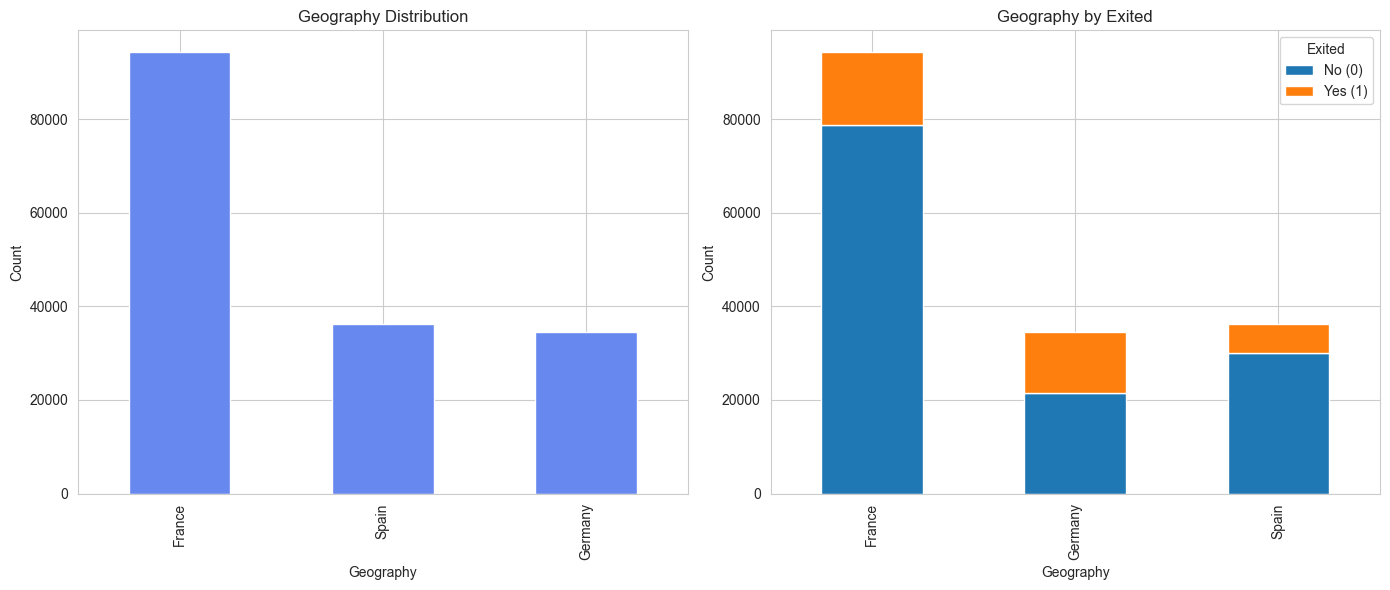


Summary for Geography:

           total  exited_1  percentage_exited
Geography                                    
France     94215     15572          16.528154
Germany    34606     13114          37.895163
Spain      36213      6235          17.217574
--------------------------------------------------


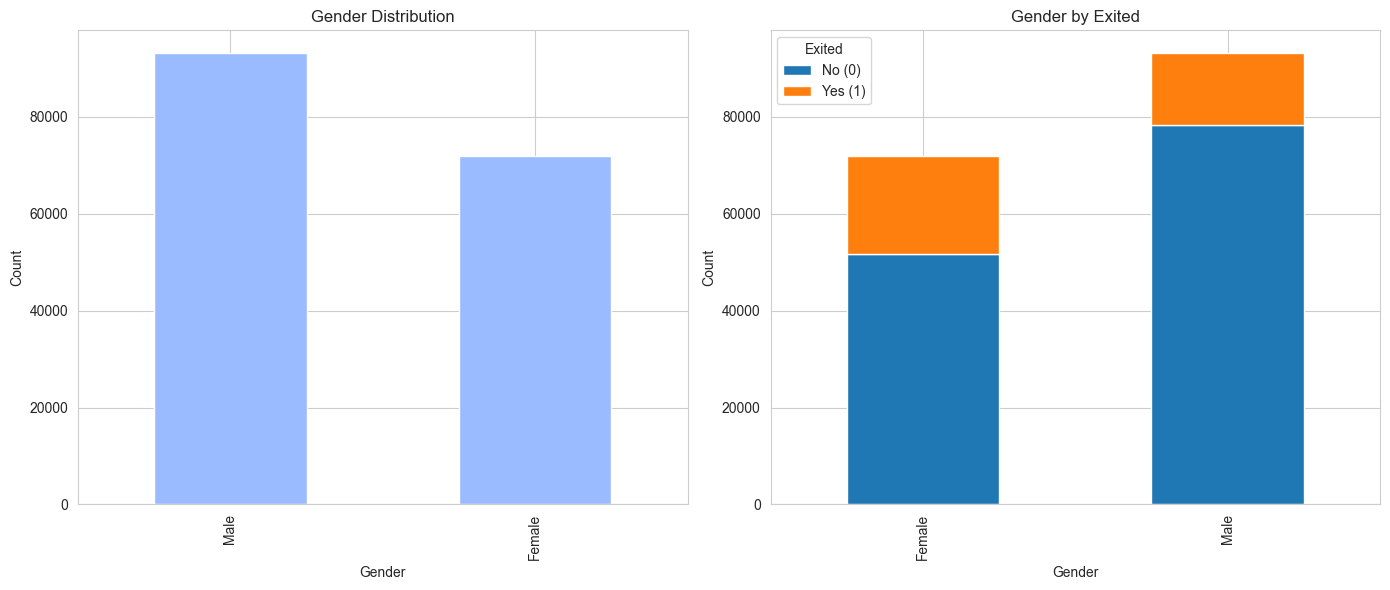


Summary for Gender:

        total  exited_1  percentage_exited
Gender                                    
Female  71884     20105          27.968672
Male    93150     14816          15.905529
--------------------------------------------------


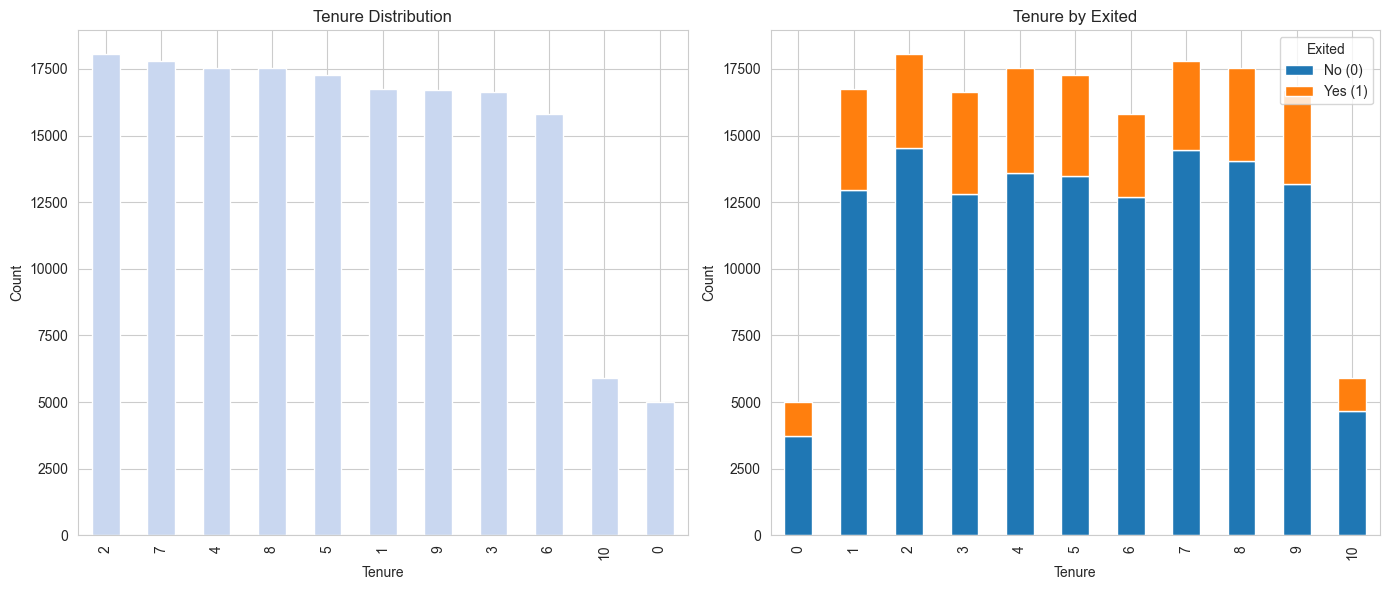


Summary for Tenure:

        total  exited_1  percentage_exited
Tenure                                    
0        5007      1276          25.484322
1       16760      3790          22.613365
2       18045      3516          19.484622
3       16630      3810          22.910403
4       17554      3974          22.638715
5       17268      3800          22.006023
6       15822      3145          19.877386
7       17810      3341          18.759124
8       17520      3468          19.794521
9       16709      3544          21.210126
10       5909      1257          21.272635
--------------------------------------------------


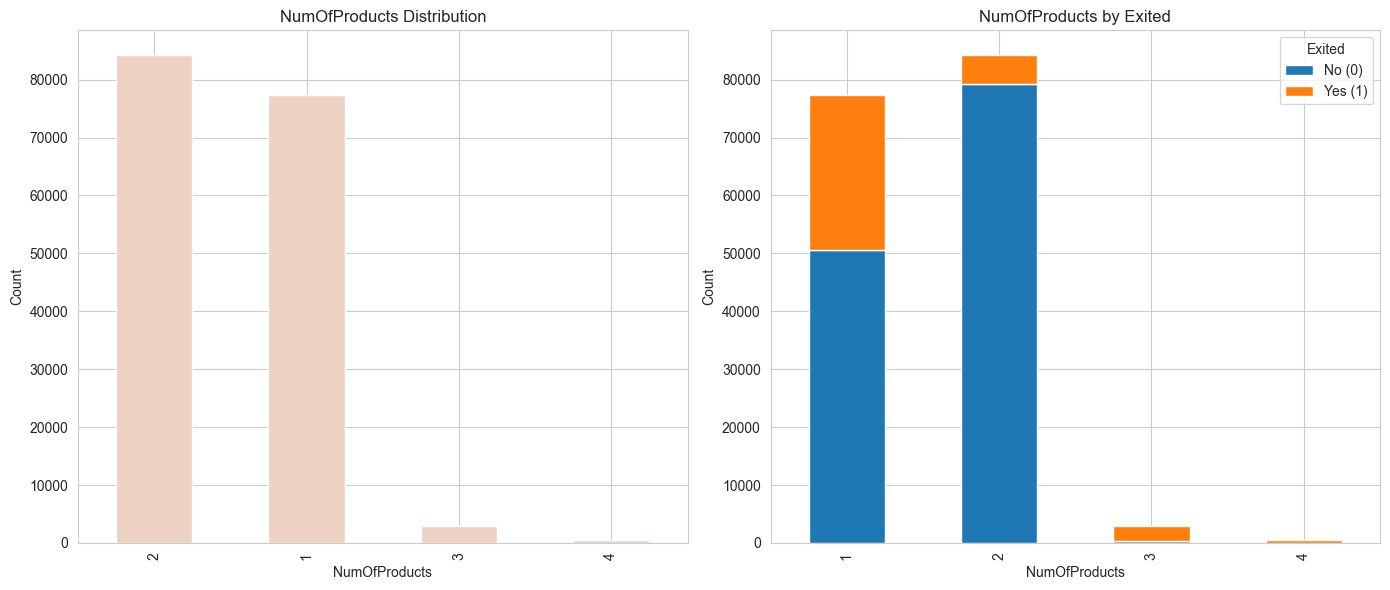


Summary for NumOfProducts:

               total  exited_1  percentage_exited
NumOfProducts                                    
1              77374     26858          34.711919
2              84291      5093           6.042163
3               2894      2554          88.251555
4                475       416          87.578947
--------------------------------------------------


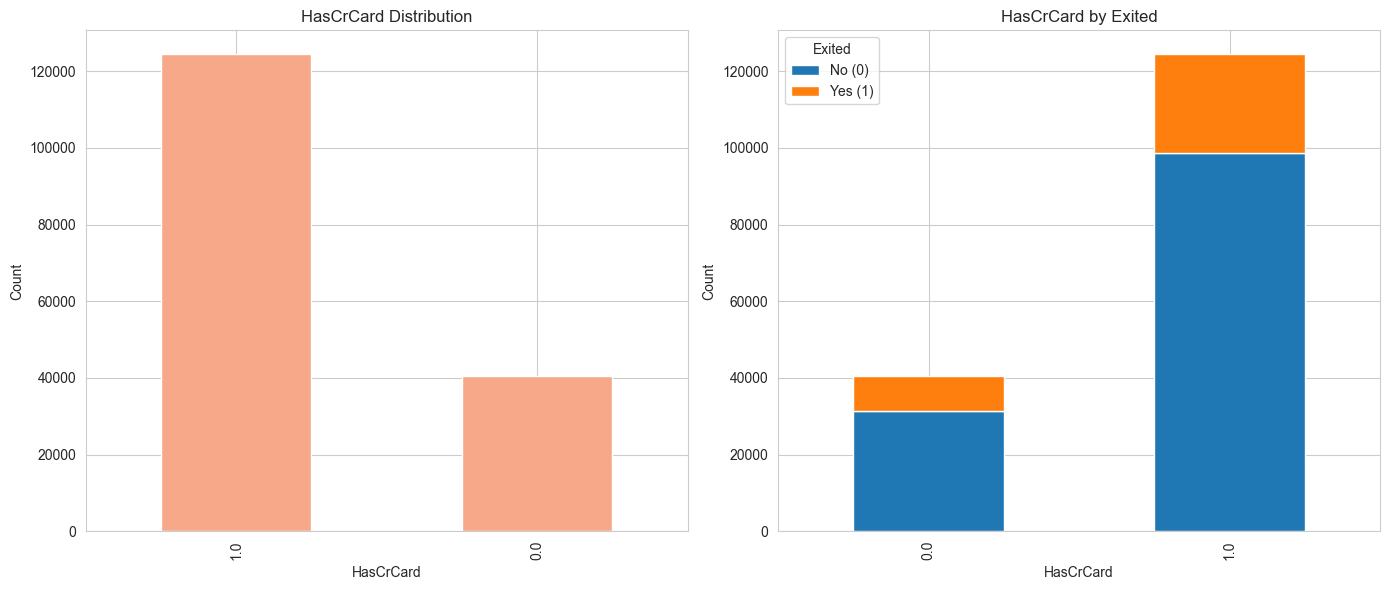


Summary for HasCrCard:

            total  exited_1  percentage_exited
HasCrCard                                     
0.0         40606      9235          22.742944
1.0        124428     25686          20.643264
--------------------------------------------------


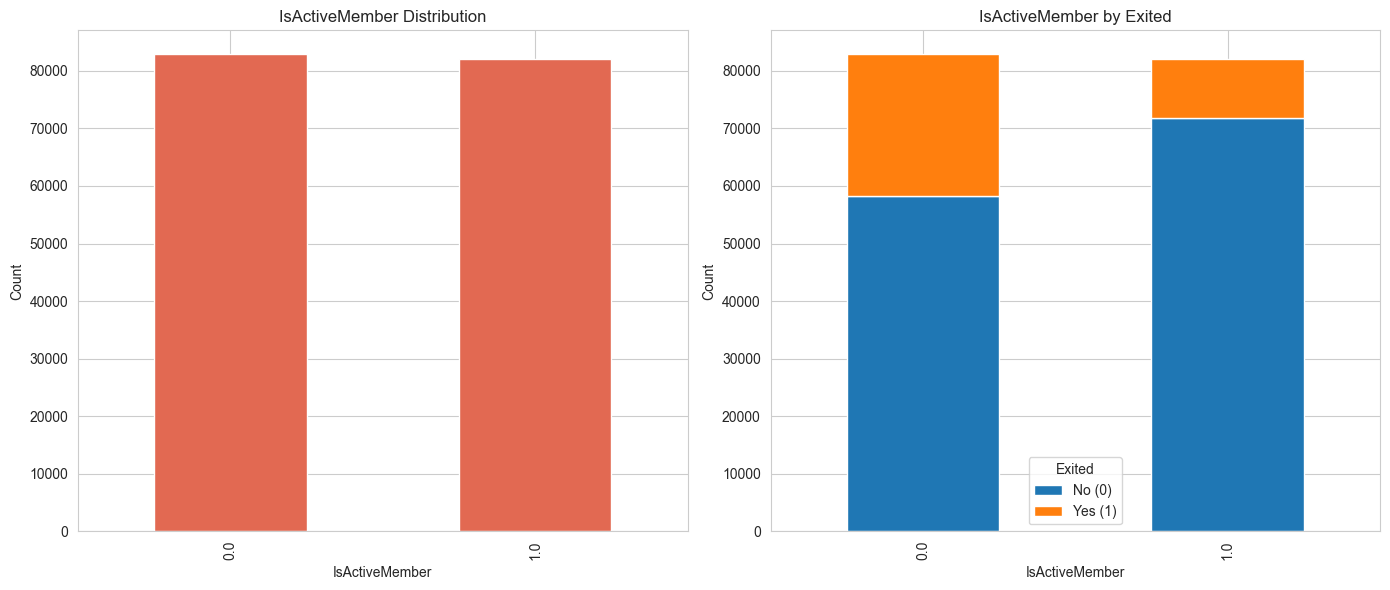


Summary for IsActiveMember:

                total  exited_1  percentage_exited
IsActiveMember                                    
0.0             82885     24624          29.708632
1.0             82149     10297          12.534541
--------------------------------------------------


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a modern seaborn style
sns.set_style("whitegrid")

# Define a dynamic color palette
palette_main = sns.color_palette("coolwarm", len(variables))  # Ensure enough colors
palette_exited = ["#1f77b4", "#ff7f0e"]  # Blue & Orange for "Exited" split

# List of variables to iterate over
variables = [
    'Geography', 'Gender', 'Tenure', 'NumOfProducts', 
    'HasCrCard', 'IsActiveMember'
]

# Loop through each variable
for idx, variable in enumerate(variables):
    # Calculate value counts
    variable_counts = data[variable].value_counts()
    
    # Calculate counts split by Exited
    variable_exited_counts = data.groupby([variable, 'Exited'], observed=False).size().unstack(fill_value=0)

    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Overall distribution (use idx to select colors safely)
    color_main = palette_main[idx % len(palette_main)]  # Ensures no out-of-range error
    variable_counts.plot(kind='bar', ax=axes[0], color=color_main, title=f'{variable} Distribution')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Count')

    # Split distribution by Exited
    variable_exited_counts.plot(kind='bar', stacked=True, ax=axes[1], color=palette_exited, title=f'{variable} by Exited')
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel('Count')
    axes[1].legend(title='Exited', labels=['No (0)', 'Yes (1)'])

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

    # Summary Table
    variable_summary = data.groupby(variable, observed=False).agg(
        total=('Exited', 'count'),
        exited_1=('Exited', lambda x: (x == 1).sum())
    )
    variable_summary['percentage_exited'] = (variable_summary['exited_1'] / variable_summary['total']) * 100

    print(f"\nSummary for {variable}:\n")
    print(variable_summary)
    print("-" * 50)


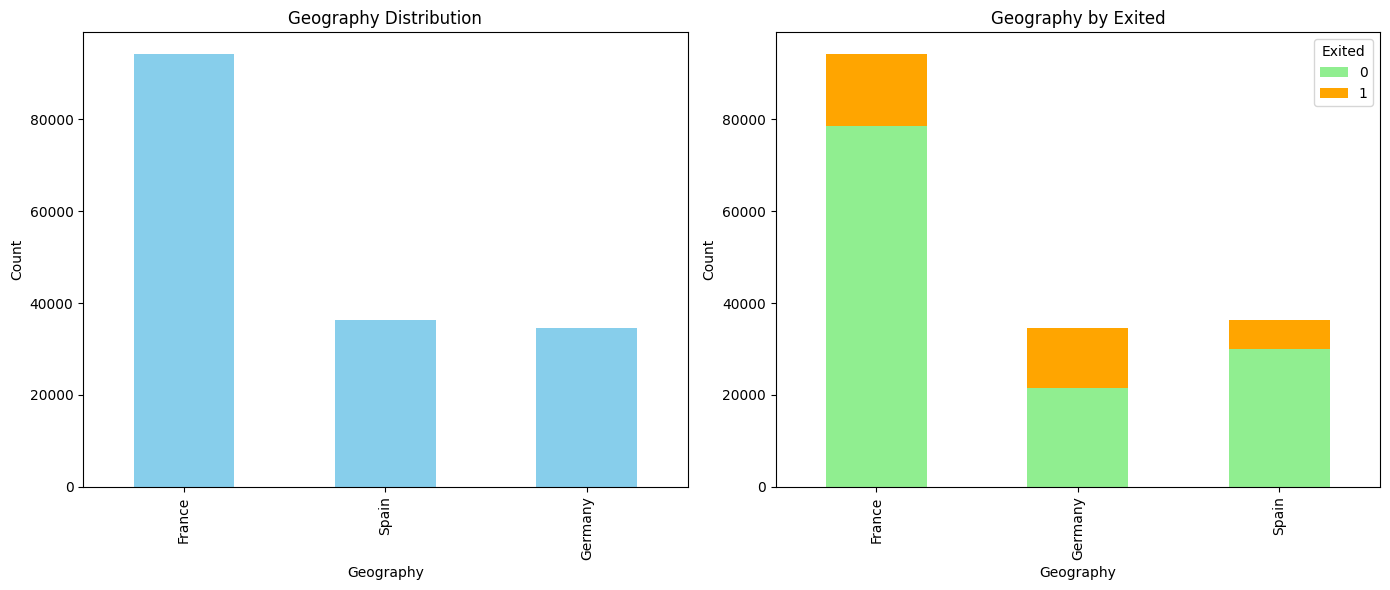


Summary for Geography:

           total  exited_1  percentage_exited
Geography                                    
France     94215     15572          16.528154
Germany    34606     13114          37.895163
Spain      36213      6235          17.217574
--------------------------------------------------


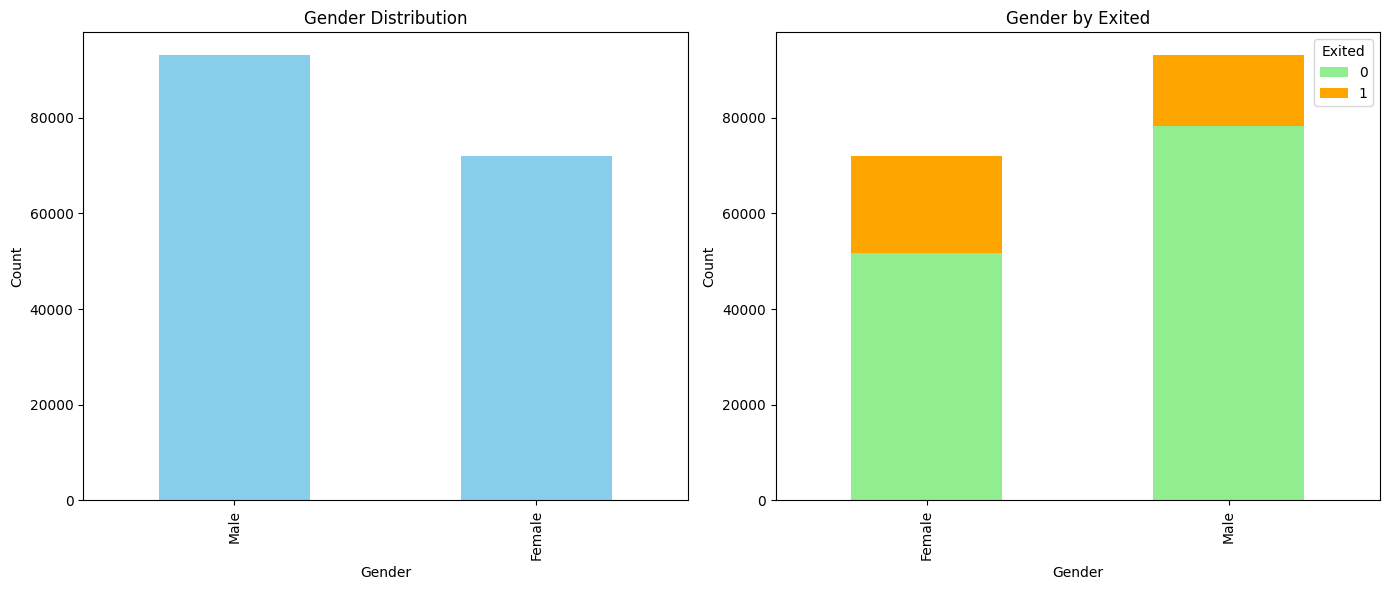


Summary for Gender:

        total  exited_1  percentage_exited
Gender                                    
Female  71884     20105          27.968672
Male    93150     14816          15.905529
--------------------------------------------------


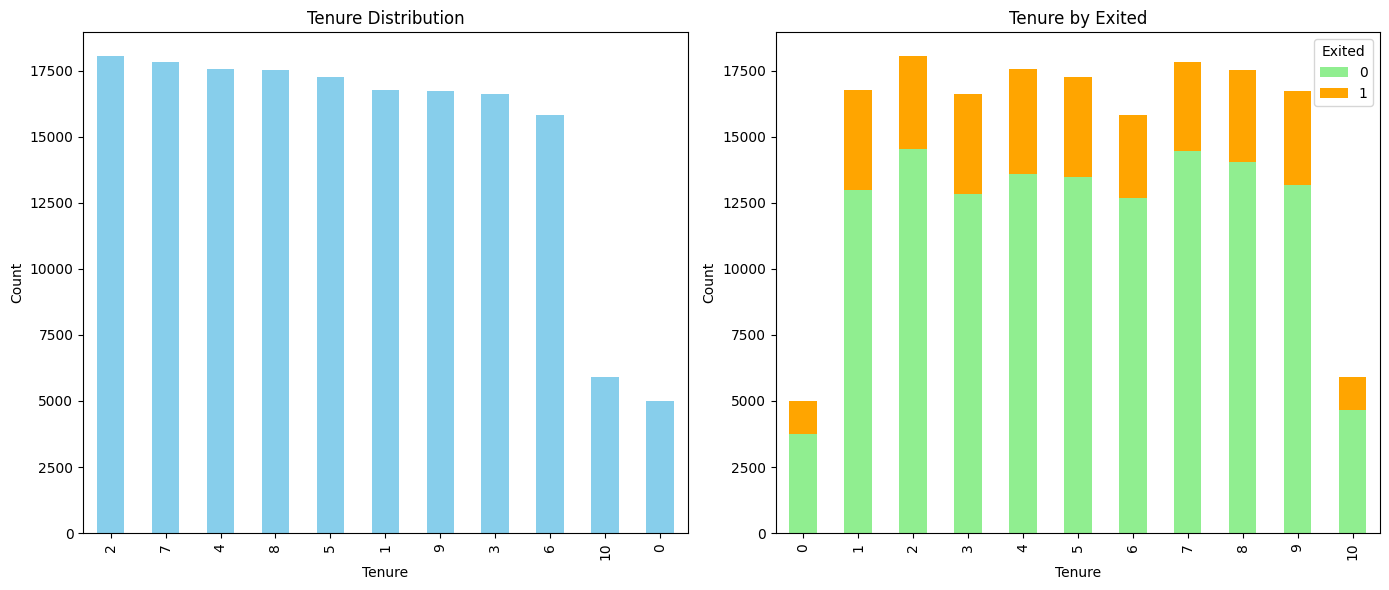


Summary for Tenure:

        total  exited_1  percentage_exited
Tenure                                    
0        5007      1276          25.484322
1       16760      3790          22.613365
2       18045      3516          19.484622
3       16630      3810          22.910403
4       17554      3974          22.638715
5       17268      3800          22.006023
6       15822      3145          19.877386
7       17810      3341          18.759124
8       17520      3468          19.794521
9       16709      3544          21.210126
10       5909      1257          21.272635
--------------------------------------------------


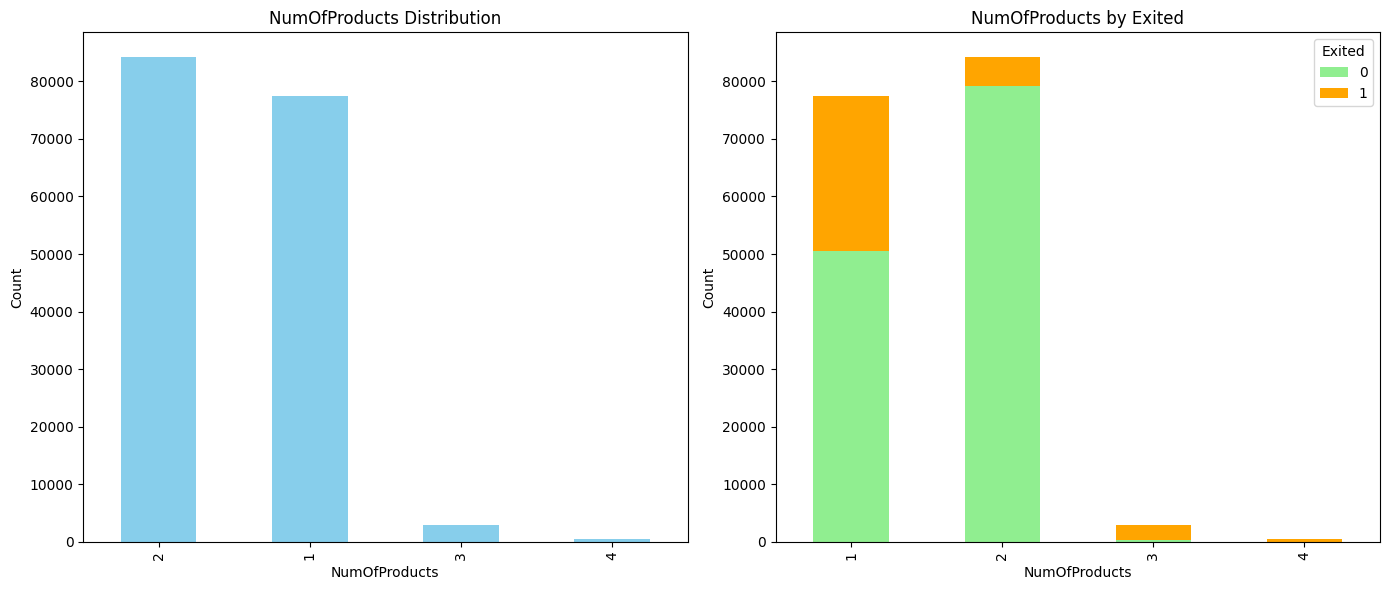


Summary for NumOfProducts:

               total  exited_1  percentage_exited
NumOfProducts                                    
1              77374     26858          34.711919
2              84291      5093           6.042163
3               2894      2554          88.251555
4                475       416          87.578947
--------------------------------------------------


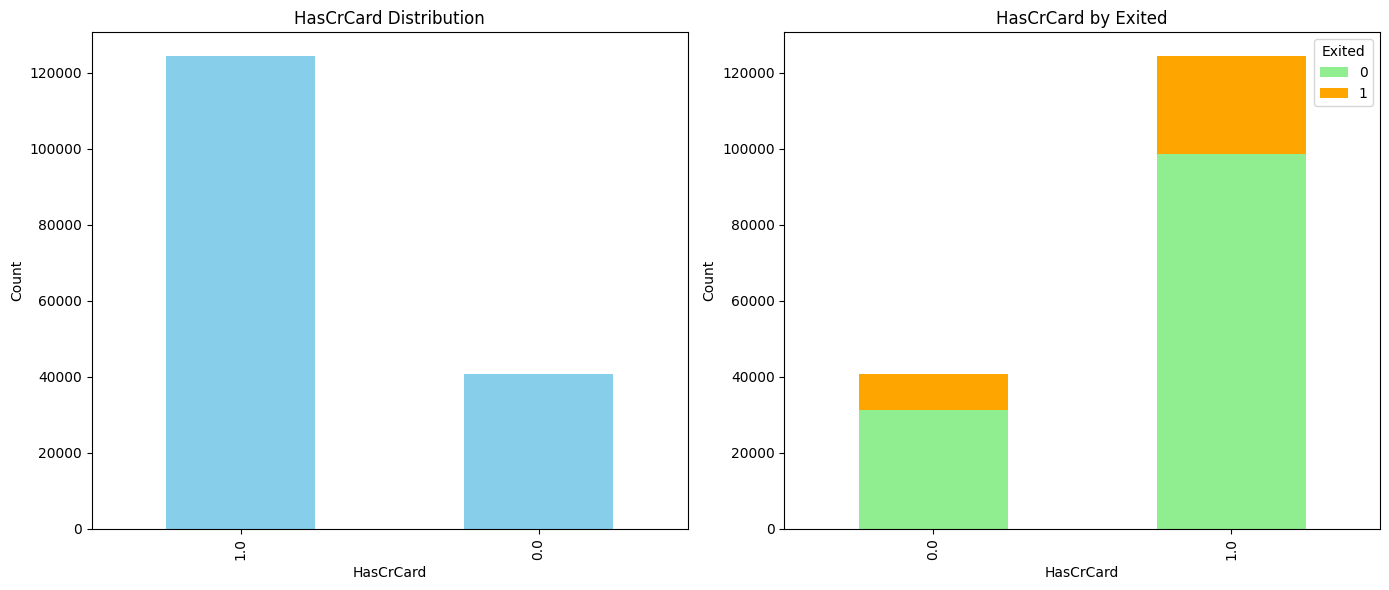


Summary for HasCrCard:

            total  exited_1  percentage_exited
HasCrCard                                     
0.0         40606      9235          22.742944
1.0        124428     25686          20.643264
--------------------------------------------------


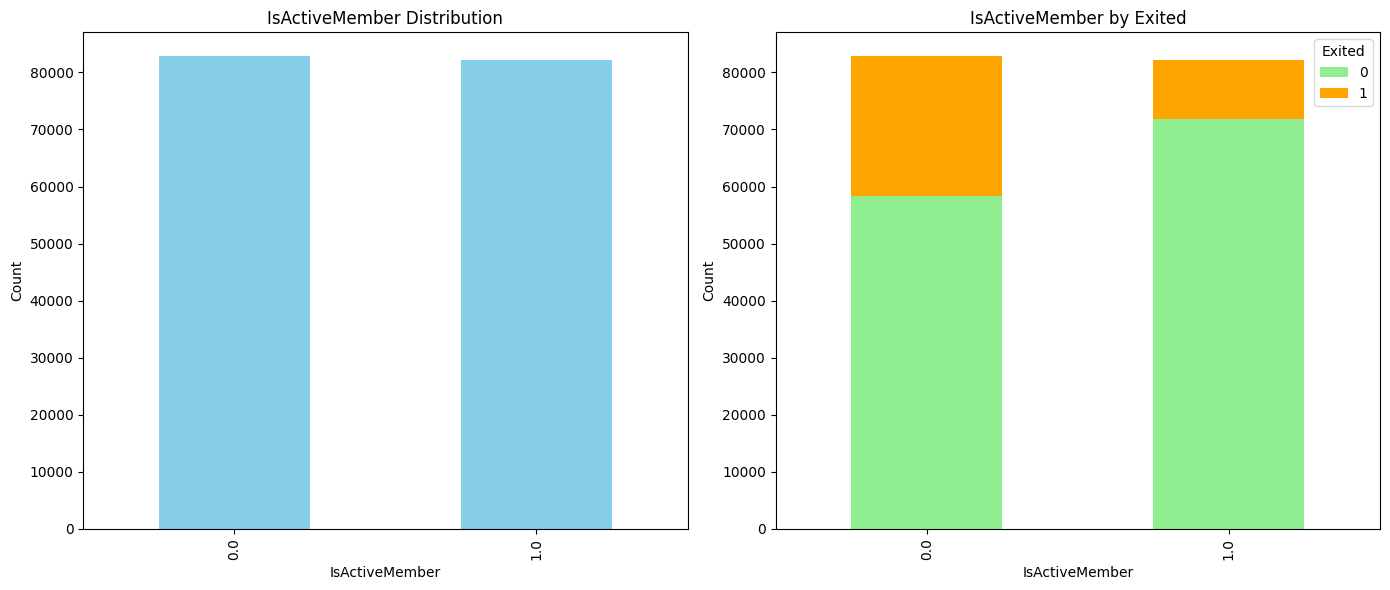


Summary for IsActiveMember:

                total  exited_1  percentage_exited
IsActiveMember                                    
0.0             82885     24624          29.708632
1.0             82149     10297          12.534541
--------------------------------------------------


In [6]:
import matplotlib.pyplot as plt

# List of variables to iterate over
variables = [
    'Geography', 'Gender', 'Tenure', 'NumOfProducts', 
    'HasCrCard', 'IsActiveMember', #'Complain', 
    #'Satisfaction Score', 'Card Type'
]

# Loop through each variable
for variable in variables:
    # Calculate the value counts for the variable
    variable_counts = data[variable].value_counts()

    # Calculate the value counts for the variable split by Exited
    variable_exited_counts = data.groupby([variable, 'Exited'], observed=False).size().unstack(fill_value=0)

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the overall distribution of the variable
    variable_counts.plot(kind='bar', ax=axes[0], color='skyblue', title=f'{variable} Distribution')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Count')

    # Plot the split distribution of the variable by Exited
    variable_exited_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['lightgreen', 'orange'], title=f'{variable} by Exited')
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel('Count')
    axes[1].legend(title='Exited', labels=['0', '1'])

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    # Group the data by the variable and calculate counts for Exited = 1 and total
    variable_summary = data.groupby(variable, observed=False).agg(
        total=('Exited', 'count'),
        exited_1=('Exited', lambda x: (x == 1).sum())
    )

    # Calculate the percentage of Exited = 1
    variable_summary['percentage_exited'] = (variable_summary['exited_1'] / variable_summary['total']) * 100

    # Display the result
    print(f"\nSummary for {variable}:\n")
    print(variable_summary)
    print("-" * 50)


### 1.6 Visualización de las distibuciones de las variables numéricas con respecto a la variable objetivo

Observaciones:
* La mayor parte de clientes tiene un buen `CreditScore`
* Hay muchos clientes con un `Balance` cero, un porcentaje considerable de ellos se salen pero no es ni un séptimo.
* La edad sí parece influir

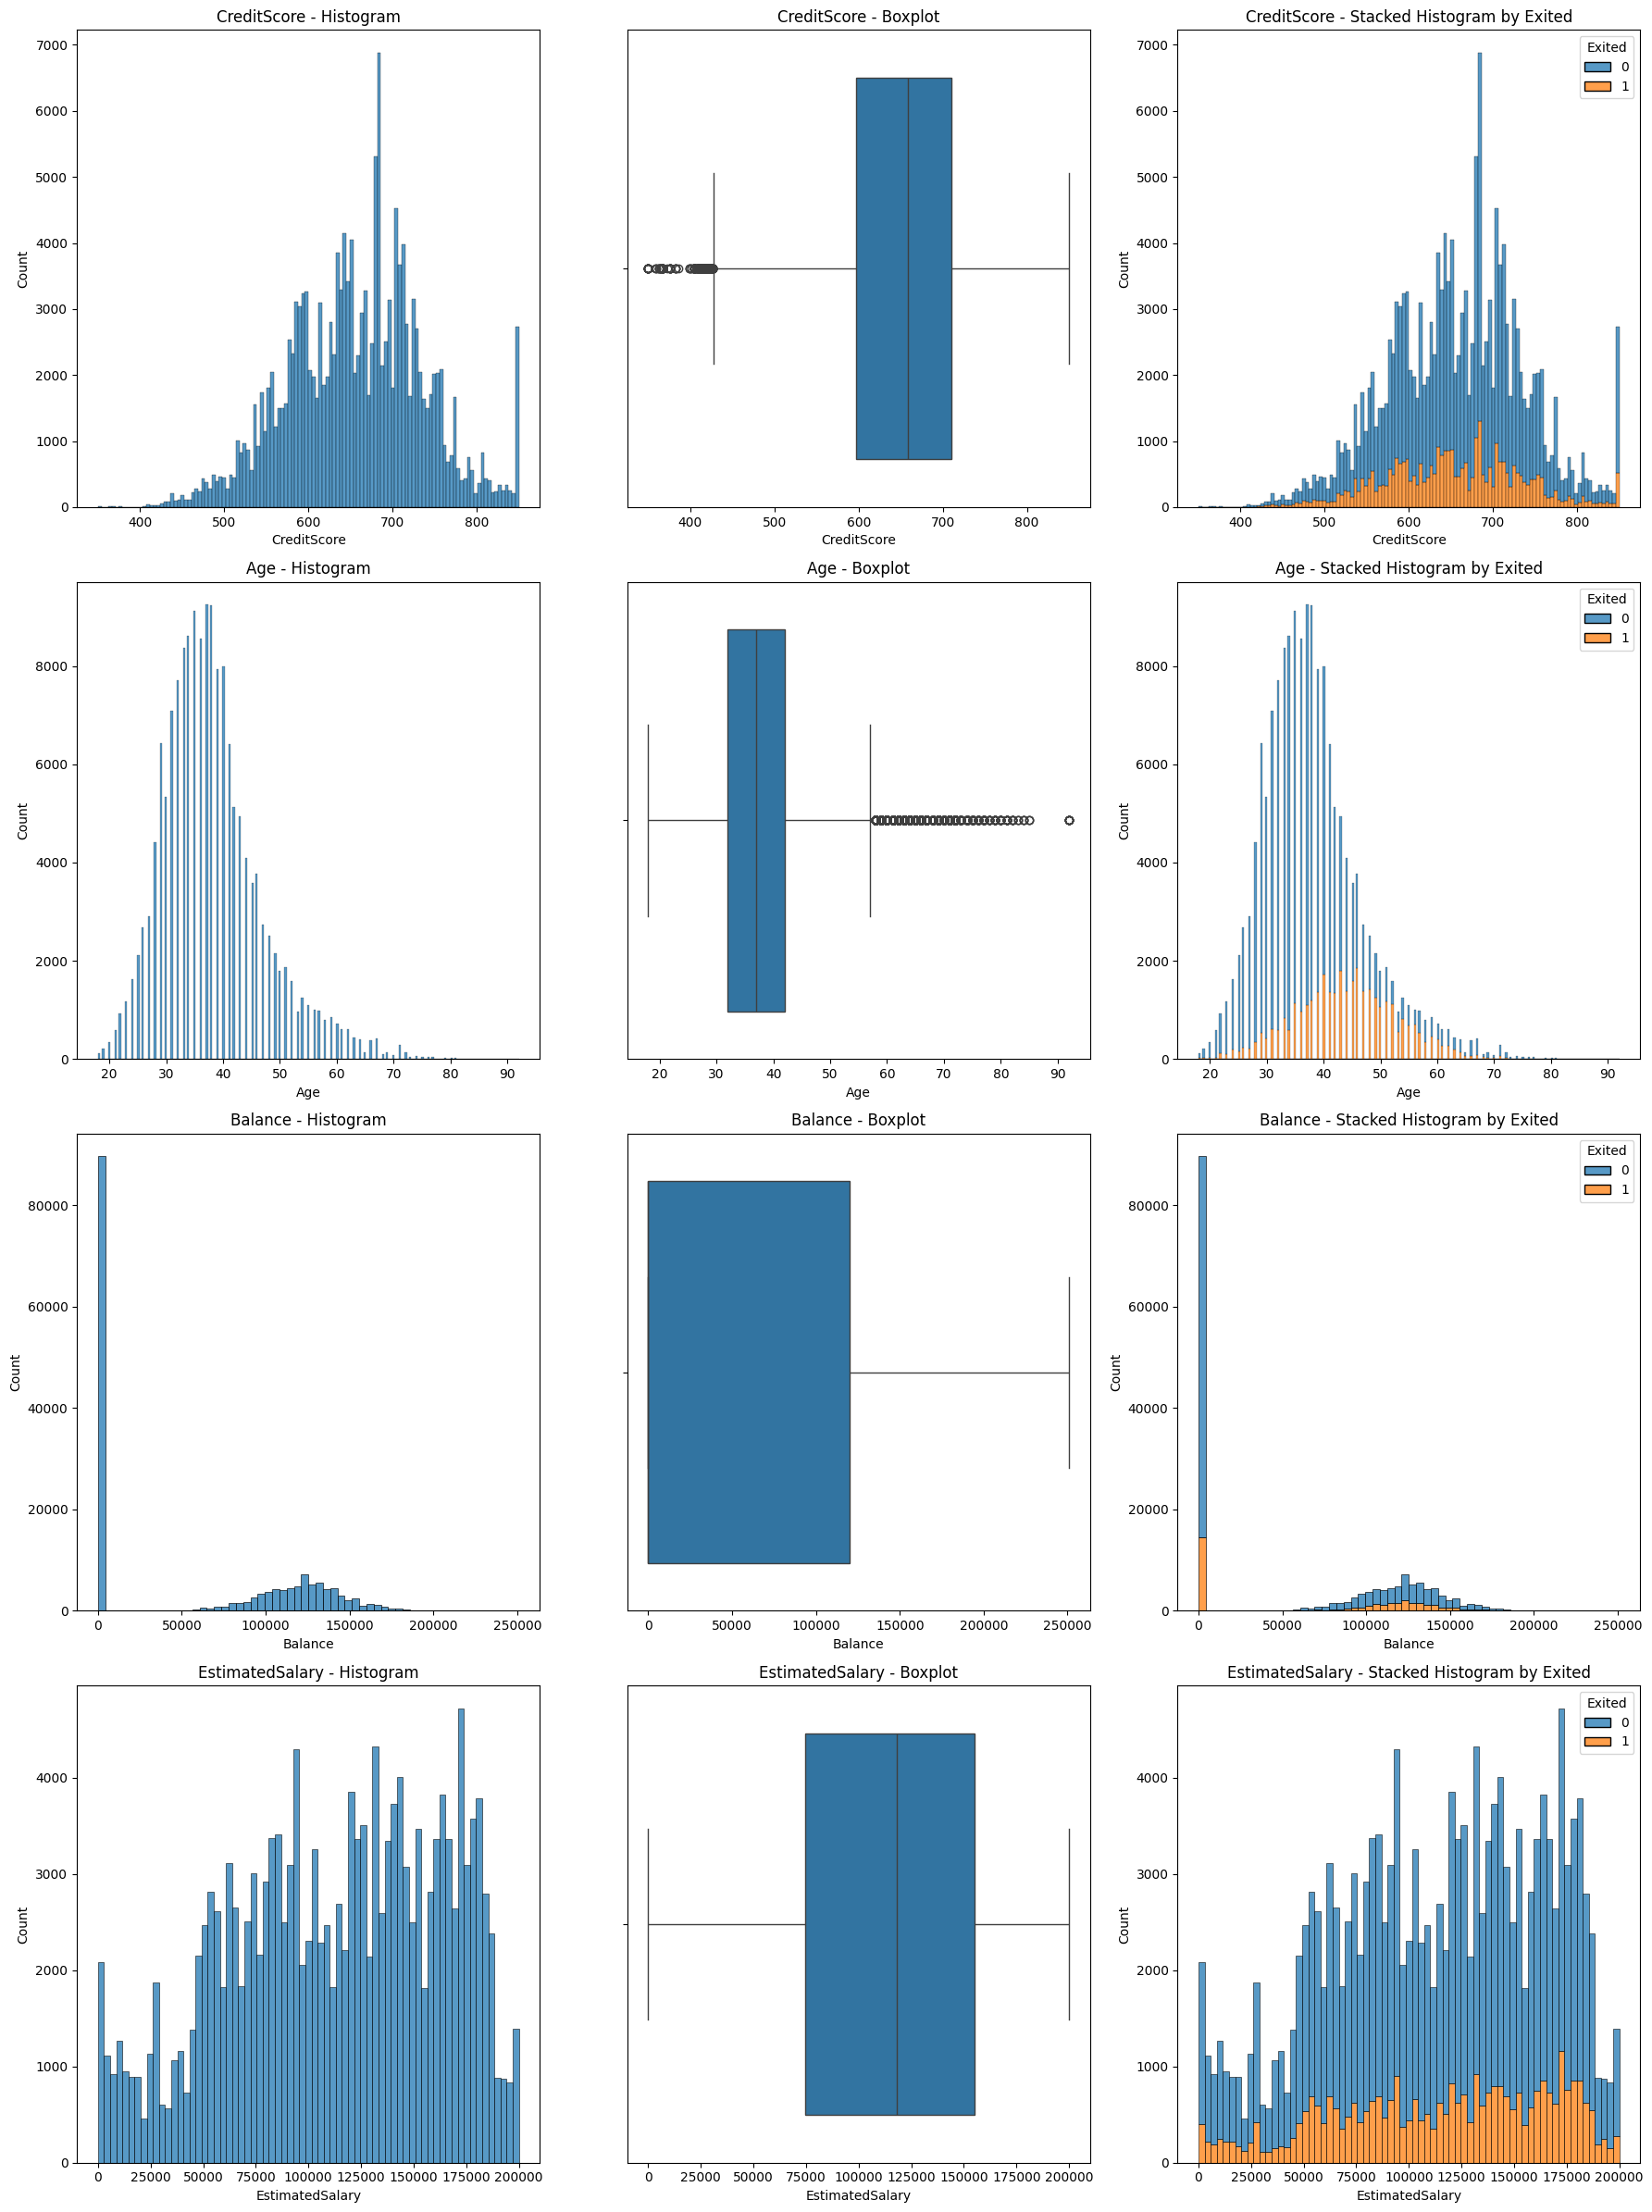

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] #, 'Point Earned'

# Set the figure size
plt.figure(figsize=(18, len(variables) * 6))

# Loop through each variable to create the plots
for i, var in enumerate(variables):
    # Histogram
    plt.subplot(len(variables), 3, 3 * i + 1)
    sns.histplot(x=data[var], kde=False)
    plt.title(f'{var} - Histogram')
    plt.xlabel(var)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(len(variables), 3, 3 * i + 2)
    sns.boxplot(x=data[var])
    plt.title(f'{var} - Boxplot')
    plt.xlabel(var)

    # Stacked histogram with Exited variable
    plt.subplot(len(variables), 3, 3 * i + 3)
    sns.histplot(data=data, x=var, hue='Exited', multiple='stack', kde=False)
    plt.title(f'{var} - Stacked Histogram by Exited')
    plt.xlabel(var)
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### 1.7 Análisis de correlaciones

De acuerdo con el heatmap:
* Conforme aumenta el `Balance` disminuyen los productos
* La edad es un factor importante para la variable objetivo

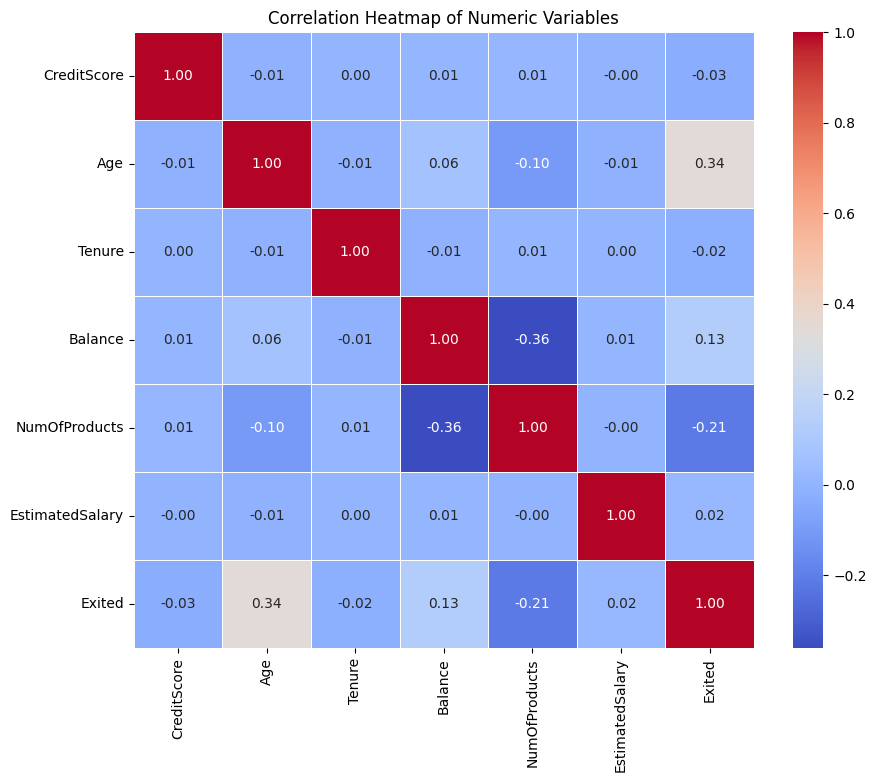

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 
                   'NumOfProducts', 'EstimatedSalary', 'Exited'] #, 'Satisfaction Score', 'Point Earned'

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


De los resultados del ANOVA podemos decir que:
* `HasCrCard` y `Card Type` no están significativamente relacionados con `Exited`
* `Complain` tiene un nivel de significacia excepcionalmente alto 
* `IsActiveMember` y `Gender` tienen un nivel de significancia alto
* `Geography` tiene una asociación significante con la variable objetivo

In [10]:
import pandas as pd
import scipy.stats as stats

# List of categorical columns
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'] #, 'Complain', 'Card Type'

# Perform ANOVA for each categorical variable
anova_results = {}
for column in categorical_columns:
    groups = [data[data['Exited'] == group][column].astype('category').cat.codes for group in data['Exited'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[column] = {'F-statistic': f_val, 'p-value': p_val}

# Convert the results into a DataFrame for display
anova_results_df = pd.DataFrame(anova_results).T

anova_results_df

# import ace_tools as tools; tools.display_dataframe_to_user(name="ANOVA Results for Categorical Variables", dataframe=anova_results_df)


,F-statistic,p-value
Geography,470.942206,2.798926e-104
Gender,3616.693181,0.000000e+00
HasCrCard,80.944744,2.344899e-19
IsActiveMember,7631.666191,0.000000e+00


## 2. Transformaciones de Datos

### 2.1 Normalización y Escalamiento

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to Balance and EstimatedSalary
data[['Balance', 'EstimatedSalary']] = scaler.fit_transform(data[['Balance', 'EstimatedSalary']])

# Verify the transformation
print(data[['Balance', 'EstimatedSalary']].head())


    Balance  EstimatedSalary
0  0.000000         0.907279
1  0.000000         0.247483
2  0.000000         0.924364
3  0.593398         0.422787
4  0.000000         0.075293


### 2.2 Codificación de Variables Categóricas

In [12]:
# Check the data types of all columns in the DataFrame
print(data.dtypes)


CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


Solotenemos 3 variables categóricas: 
* `Geography`, se convertira a onehot encoding
* `Gender`, se converitra a booleano, datos que estos datos no tienen más que dos opciones
* `Card Type`, se convertira en ordinal

In [14]:
import pandas as pd

# One-hot encode the Geography column
data = pd.get_dummies(data, columns=['Geography'], prefix='Geography')

# Convert Gender to boolean (1 for Male, 0 for Female)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# # Convert Card Type to ordinal values
# card_type_mapping = {'DIAMOND': 0, 'PLATINUM': 1, 'GOLD': 2, 'SILVER': 3}
# data['Card Type'] = data['Card Type'].map(card_type_mapping)

# Verify the transformations
print(data.head())


### 2.3 Creación de Variables

Ahora vamos a explorar interacciones entre `Balance` y `NumOfProducts`

* Churn y Balance: Un balance más alto parece aumentar la probabilidad de churn (Exited = 1), particularmente en clientes con menos productos.
* Churn y Participación en Productos: Los clientes con más productos (por ejemplo, 3 o 4) tienen menos probabilidades de churn, lo que sugiere que la venta cruzada o aumentar la participación en productos podría reducir las tasas de churn.
* Grupo con Balance Cero: Los clientes con un balance de 0 y menos productos (1 o 2) tienen menos probabilidades de churn. Esto podría representar a clientes desenganchados que no están utilizando activamente los servicios.

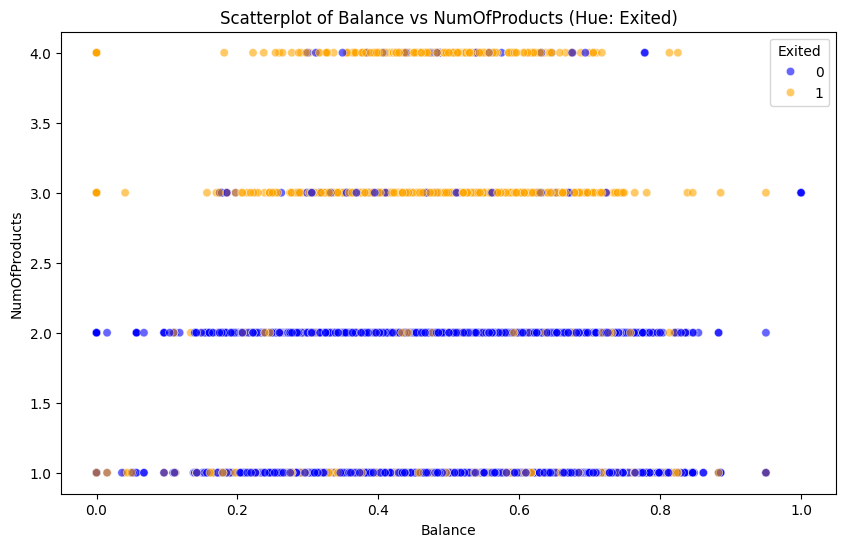

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with hue as Exited
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Balance'],
    y=data['NumOfProducts'],
    hue=data['Exited'],
    alpha=0.6,
    palette=['blue', 'orange']
)
plt.title('Scatterplot of Balance vs NumOfProducts (Hue: Exited)')
plt.xlabel('Balance')
plt.ylabel('NumOfProducts')
plt.show()


Balance Coefficient (-2.7300567):

Este coeficiente negativo sugiere que a medida que Balance aumenta, la probabilidad de churn (Exited = 1) disminuye.
Un valor negativo fuerte indica que los clientes con balances más altos tienen menos probabilidades de churn cuando se consideran de forma independiente de otros factores.

NumOfProducts Coefficient (-1.01294749):

Este coeficiente negativo indica que a medida que aumenta el número de productos, la probabilidad de churn disminuye significativamente.
Por ejemplo, pasar de 1 a 2 productos reduce sustancialmente la probabilidad de churn.

Interaction Term Coefficient (Balance_NumOfProducts_Interaction) (2.49112874):

El coeficiente positivo de interacción sugiere que el efecto combinado de Balance y NumOfProducts aumenta la probabilidad de churn.
Por ejemplo:
Para un cliente con un balance alto y un alto número de productos, la interacción contrarresta ligeramente los efectos individuales de reducción de churn.
Esto puede indicar rendimientos decrecientes al aumentar simultáneamente el balance y la cantidad de productos.

In [16]:
# Add an interaction term
data['Balance_NumOfProducts_Interaction'] = data['Balance'] * data['NumOfProducts']

# Use this term in your model
# Example for linear regression:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[['Balance', 'NumOfProducts', 'Balance_NumOfProducts_Interaction']]
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print(f"Model Coefficients: {model.coef_}")


Model Coefficients: [[-4.33336289 -1.86788505  3.47862387]]


Revisemos ahora `Satisfaction Score` y `IsActiveMember`

In [18]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Create a crosstab of Satisfaction Score and IsActiveMember
# satisfaction_active_counts = pd.crosstab(data['Satisfaction Score'], data['IsActiveMember'])

# # Plot a grouped bar chart
# fig, ax = plt.subplots(figsize=(12, 6))
# satisfaction_active_counts.plot(kind='bar', ax=ax, stacked=False, color=['skyblue', 'orange'])

# # Add labels and title
# ax.set_xlabel('Satisfaction Score')
# ax.set_ylabel('Count')
# ax.set_title('Comparison of Satisfaction Score and IsActiveMember')
# ax.legend(title='IsActiveMember', labels=['Inactive', 'Active'])

# # Show the plot
# plt.tight_layout()
# plt.show()


Satisfaction Score Coefficient (-0.00637866):

Este pequeño valor negativo indica que a medida que Satisfaction Score aumenta, la probabilidad de churn (Exited = 1) disminuye ligeramente.
Sin embargo, el impacto es muy pequeño, lo que sugiere que no es un predictor fuerte por sí solo.

IsActiveMember Coefficient (-0.76382158):

Este coeficiente negativo más grande indica que ser un miembro activo reduce significativamente la probabilidad de churn.
Los clientes que están activamente comprometidos con la compañía tienen muchas menos probabilidades de abandonar.

Interaction Term Coefficient (Satisfaction Score_IsActiveMember_Interaction) (-0.00588554):

El pequeño coeficiente negativo para el término de interacción sugiere que el efecto combinado de un Satisfaction Score más alto y ser un miembro activo reduce aún más la probabilidad de churn, aunque el impacto es modesto.

In [20]:
# # Add an interaction term
# data['Satisfaction Score_IsActiveMember_Interaction'] = data['Satisfaction Score'] * data['IsActiveMember']

# # Use this term in your model
# # Example for linear regression:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# X = data[['Satisfaction Score', 'IsActiveMember', 'Satisfaction Score_IsActiveMember_Interaction']]
# y = data['Exited']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model = LogisticRegression()
# model.fit(X_train, y_train)
# print(f"Model Coefficients: {model.coef_}")

In [21]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Balance_NumOfProducts_Interaction'],
      dtype='object')

In [ ]:
#'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       # 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', ##############################'Complain',
       # 'Geography_France', #########################################'Satisfaction Score', 'Card Type', 'Point Earned',
       # 'Geography_Germany', 'Geography_Spain',
       # 'Balance_NumOfProducts_Interaction',
      ################################################## # 'Satisfaction Score_IsActiveMember_Interaction'